In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Q1

## (a) Sample X-Y

### Creating random dataset

In [2]:
# This makes sure that everytime same RANDOM NUMBERS are generated.
random.seed(123)
n = 50

X = np.random.uniform(0, 1, n)
Y = 2 + 3*X + np.random.normal(0, 0.1, n)

In [3]:
sample = {'X' : X,
       'Y': Y}

df = pd.DataFrame(sample)

# To make X and Y to 2D array
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
# Splitting the dataset into the specified value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)

df.head()

,X,Y
0,0.088650,2.248759
1,0.695466,4.137959
2,0.195120,2.493202
3,0.752524,4.218820
4,0.131094,2.529140


In [4]:
# Creates an object of LinearRegression
slr = LinearRegression()

#### Training the Data

In [5]:
slr.fit(X_train, Y_train)

LinearRegression()

#### SLR coefficients

In [6]:
m = slr.coef_
m

array([[2.87750495]])

In [7]:
c = slr.intercept_
c

array([2.06688145])

#### Regression graph.

##### Trained Data 

In [8]:
# This is same as Y = mX + c
Y_pred_train = slr.predict(X_train)
Y_pred_train.flatten()

array([3.31157   , 3.49132355, 3.93540205, 3.01677611, 2.83418365,
       4.39145298, 4.37770291, 3.04574019, 3.21545379, 4.59873244,
       2.29255343, 3.48356823, 3.80835896, 2.27960217, 4.04525803,
       4.5984324 , 3.75481282, 4.40250007, 4.32611624, 4.14879457,
       3.8473811 , 4.06808727, 3.65298968, 3.26935609, 4.7211165 ,
       3.77061772, 3.11452571, 4.28791419, 4.42514759, 4.58669867,
       2.53075483, 3.10801472, 3.73663081, 4.2322724 , 2.32197211,
       4.32869623, 4.67126286])

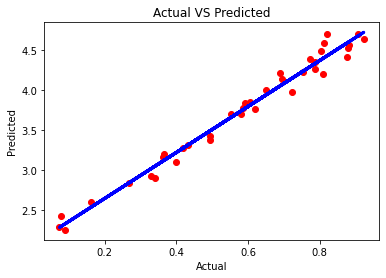

In [9]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, Y_pred_train, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

###### R^2 test

In [10]:
r2_score(Y_train, Y_pred_train)

0.9787305247796177

##### Tested Data

In [11]:
Y_pred_test = slr.predict(X_test)
Y_pred_test.flatten()

array([3.00329623, 4.86932224, 2.57635504, 3.81797684, 2.62834043,
       3.77094567, 2.17803039, 4.70002992, 4.49231671, 2.44410648,
       3.40370126, 4.24973667, 4.38165155])

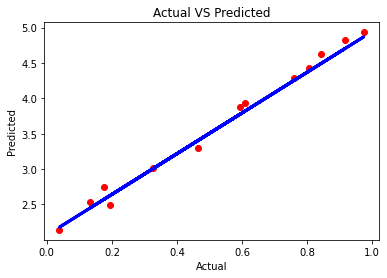

In [12]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, Y_pred_test, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

###### R^2 test

In [13]:
r2_score(Y_test, Y_pred_test)

0.9884096731041729

#### Predicting output for new Datapoint


In [14]:
new_data = [[0.475659]]
slr.predict(new_data)

array([[3.43559258]])

In [15]:
# .ravel() is used to convert 2D arrays to 1D arrays

pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,3.008547,3.003296,0.005251
1,4.933596,4.869322,0.064274
2,2.745440,2.576355,0.169085
3,3.933568,3.817977,0.115591
4,2.493202,2.628340,-0.135139
5,3.876762,3.770946,0.105817
6,2.139829,2.178030,-0.038201
7,4.817548,4.700030,0.117518
8,4.630275,4.492317,0.137958
9,2.529140,2.444106,0.085033


##### The difference is very less so this shows that our model is pretty accurate

#### SLR errors (inbuilt funcs)

In [16]:
# Mean Absolute Error
MAE = mean_absolute_error(Y_test, Y_pred_test)
MAE

0.08971778812551162

In [17]:
# Mean Squared Error
MSE = mean_squared_error(Y_test, Y_pred_test)
MSE

0.010114109859141655

In [18]:
# Sum of Squared Residuals
SSR = ((Y_pred_test - Y_test)**2).sum()
SSR

0.1314834281688415

#### SLR errors (manually computed)

In [19]:
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(Y_test - Y_pred_test))
mae

0.08971778812551162

In [20]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((Y_test - Y_pred_test)**2)
mse

0.010114109859141655

In [21]:
# Calculate Sum of Squared Residuals (SSR)
ssr = np.sum((Y_pred_test - Y_test)**2)
ssr

0.1314834281688415

###### We can see that the manually computed MAE, MSE, SSR are equal to the ones that we Calculated using inbuilt functions

## (b) Student Marks

#### Generating Random Dataset

In [22]:
np.random.seed(123)

n = 50

X = np.random.uniform(0, 50, n)
Y = 2 + 0.2*X + np.random.uniform(0, 1, n)
Y = Y / np.max(Y) * 10

In [23]:
sample = {'X' : X,
       'Y': Y}

df = pd.DataFrame(sample)

# To make X and Y to 2D array
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

# Splitting the dataset into the specified value by test size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)

df.head()

,X,Y
0,34.823459,7.413880
1,14.306967,4.641353
2,11.342573,3.975344
3,27.565738,6.575734
4,35.973448,7.782834


In [24]:
slr = LinearRegression()

#### Training the data

In [25]:
slr.fit(X_train, Y_train)

LinearRegression()

#### SLR Coeffs

In [26]:
m = slr.coef_
m

array([[0.15864956]])

In [27]:
c = slr.intercept_
c

array([2.14992212])

#### Regression Graph

##### Trained Data

In [28]:
Y_pred_train = slr.predict(X_train)
Y_pred_train.flatten()

array([5.52781163, 6.36644183, 7.58231912, 5.30739952, 4.13665386,
       6.27072653, 7.1551265 , 8.00405462, 2.88054255, 5.56773162,
       3.5975338 , 4.6667823 , 7.18229392, 5.44052202, 5.96490397,
       2.62331574, 4.71178668, 5.50620491, 3.54168936, 7.09941534,
       7.01169461, 4.41971617, 5.62888691, 9.23671222, 7.88068854,
       9.92981279, 6.99685283, 5.53194459, 8.88802135, 6.36863288,
       5.2603858 , 6.13073063, 5.98158091, 6.52321453, 7.67464878,
       9.96785368, 9.02190067])

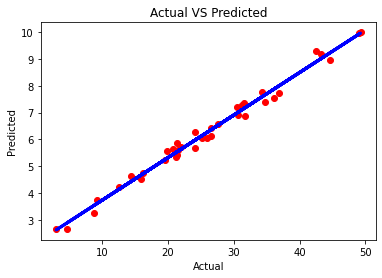

In [29]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, Y_pred_train, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

In [30]:
r2_score(Y_train, Y_pred_train)

0.9870045825443696

##### Tested Data

In [31]:
Y_pred_test = slr.predict(X_test)
Y_pred_test.flatten()

array([4.4798024 , 7.93309306, 4.87217427, 3.06706252, 3.94941634,
       3.96061523, 9.63945093, 5.59024724, 7.89664822, 7.85709407,
       6.06606842, 4.62692748, 5.01980276])

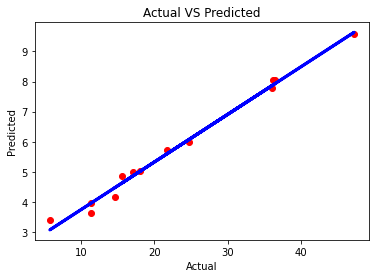

In [32]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, Y_pred_test, color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

In [33]:
r2_score(Y_test, Y_pred_test)

0.9900257493496825

In [34]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,4.153757,4.479802,-0.326045
1,8.059451,7.933093,0.126358
2,4.978666,4.872174,0.106492
3,3.387777,3.067063,0.320714
4,3.975344,3.949416,0.025927
5,3.624466,3.960615,-0.336150
6,9.585371,9.639451,-0.054080
7,5.735850,5.590247,0.145602
8,8.055672,7.896648,0.159024
9,7.782834,7.857094,-0.074260


#### The difference is very less so this shows that our model is pretty accurate

# Q2

## a) Student Marks

In [111]:
np.random.seed(123)

n = 50

X1 = np.random.randint(0, 51, n)
X2 = np.random.randint(0, 51, n)
X3 = np.random.randint(0, 51, n)

Y = 2 + 0.5*X1 + 0.3*X2 + 0.1*X3 + np.random.uniform(0, 1, n)
Y = Y / np.max(Y) * 10

df = pd.DataFrame({'Marks1': X1, 'Marks2': X2, 'Marks3': X3, 'Grade': Y})

X = df.drop(columns = 'Grade')
y = df['Grade']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)
df.head()

,Marks1,Marks2,Marks3,Grade
0,45,0,30,6.774019
1,2,11,6,1.795978
2,28,34,9,6.661166
3,34,10,23,5.860491
4,38,22,14,7.046376


In [112]:
mlr = LinearRegression()

In [113]:
mlr.fit(X_train,Y_train)

LinearRegression()

In [114]:
m = mlr.coef_
m

array([0.11933828, 0.07112262, 0.02408327])

In [115]:
c = mlr.intercept_
c

0.6218907737878929

In [116]:
Y_pred_train = mlr.predict(X_train)
Y_pred_train

array([4.83086833, 5.68481183, 8.33901257, 8.48414825, 5.88514194,
       6.72953002, 7.30963565, 8.80355446, 2.14077448, 7.00032763,
       5.602761  , 5.40984923, 3.19539191, 7.51712191, 4.60317156,
       2.36350377, 8.60878121, 4.49040004, 7.78943966, 3.36544584,
       2.10628171, 1.78741579, 9.47229923, 7.61695393, 4.8386114 ,
       4.62710749, 6.11940793, 7.4415396 , 6.37925825, 6.04843266,
       8.26857511, 5.68858637, 8.3915897 , 5.94453388, 6.71461172,
       1.33777312, 7.50241916])

In [117]:
r2_score(Y_train, Y_pred_train)

0.9992218363017696

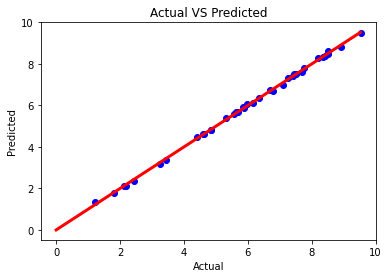

In [118]:
plt.scatter(Y_train, Y_pred_train, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

x = np.linspace(0, np.max(Y_train))
plt.plot(x, x, color='red', linewidth = 3)

plt.show()

In [119]:
Y_pred_test = mlr.predict(X_test)
Y_pred_test

array([ 7.57741207, 10.00827751,  7.27619094,  5.27338735,  6.5982812 ,
        2.88510156,  7.41985808,  5.06065554,  5.59558577,  7.05860897,
        9.50360685,  9.02497916,  5.49936751])

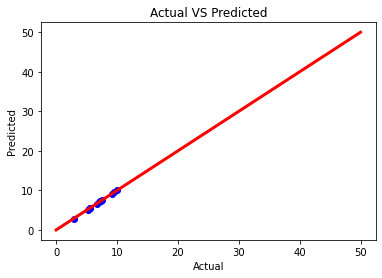

In [120]:
plt.scatter(Y_test, Y_pred_test, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

x = np.linspace(0, np.max(y_test))
plt.plot(x, x, color='red', linewidth = 3)

plt.show()

In [121]:
r2_score(Y_test, Y_pred_test)

0.9983315615337198

In [122]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,7.527839,7.577412,-0.049573
1,10.000000,10.008278,-0.008278
2,7.197859,7.276191,-0.078332
3,5.388891,5.273387,0.115504
4,6.661166,6.598281,0.062884
5,2.973335,2.885102,0.088233
6,7.348901,7.419858,-0.070957
7,5.153617,5.060656,0.092962
8,5.597138,5.595586,0.001553
9,7.046376,7.058609,-0.012233


## b) Income

In [123]:
from sklearn.datasets import fetch_openml

In [124]:
boston = fetch_openml(data_id=531)

data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

data = data.apply(pd.to_numeric)

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [125]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [126]:
m = mlr.coef_
m

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [127]:
c = mlr.intercept_
c

37.937107741832875

In [128]:
y_pred_train = mlr.predict(X_train)

In [129]:
r2_score(y_train, y_pred_train)

0.7645451026942549

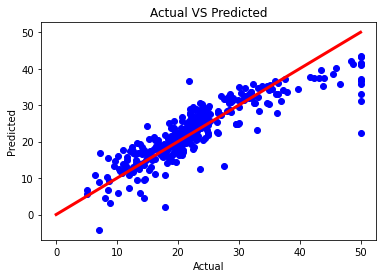

In [130]:
plt.scatter(y_train, y_pred_train, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
x = np.linspace(0, np.max(y_train))
plt.plot(x, x, color='red', linewidth = 3)
plt.show()

In [131]:
y_pred_test = mlr.predict(X_test)

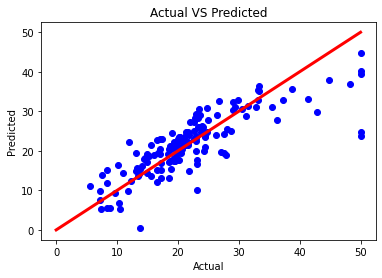

In [132]:
plt.scatter(y_test, y_pred_test, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
x = np.linspace(0, np.max(y_test))
plt.plot(x, x, color='red', linewidth = 3)
plt.show()

In [133]:
r2_score(y_test, y_pred_test)

0.6733825506400191

In [134]:
mae = mean_absolute_error(y_test, y_pred_test)
mae

3.609904060381821

In [135]:
mse = mean_squared_error(y_test, y_pred_test)
mse

27.195965766883248

In [136]:
ssr = np.sum((y_pred_test - y_test.mean())**2)
ssr

8788.350994133656

In [137]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'difference': (Y_test - Y_pred_test).ravel()
})
pred_df

,Actual Value,Predicted Value,difference
0,7.527839,7.577412,-0.049573
1,10.000000,10.008278,-0.008278
2,7.197859,7.276191,-0.078332
3,5.388891,5.273387,0.115504
4,6.661166,6.598281,0.062884
5,2.973335,2.885102,0.088233
6,7.348901,7.419858,-0.070957
7,5.153617,5.060656,0.092962
8,5.597138,5.595586,0.001553
9,7.046376,7.058609,-0.012233
